In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import plotly_express as px
import pprint

# Install plotly_express if not already installed
# %pip install plotly_express


import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'C:\Users\mabin\Desktop\DataScienceClassNotes\DATA SCIENCE CODES\Machine Learning\Decision_Tree_Implementation\MidhunDecisionTreeFoundation\breast_cancer_data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
print("Shape" ,df.shape)
print("-"*40)
print("Columns", df.columns)
print("-"*40)
print(df.info())
print("-"*40)
print("Null Values\n", df.isnull().sum())

Shape (569, 33)
----------------------------------------
Columns Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id         

In [4]:
print("Droppint the redundant columns\n")

df.drop(columns=['Unnamed: 32',"id"],axis=1, inplace=True)

df.shape

Droppint the redundant columns



(569, 31)

In [5]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [6]:
# We take Output column / Output label / Y- label as "diagnosis column"

print("Unique values in the Output label\n")
df['diagnosis'].unique()

# M : Malignant , B : Benign

Unique values in the Output label



array(['M', 'B'], dtype=object)

In [7]:
# Step 1 :
'''
Output label / Target variable / Y- label : Check the data distribution
    look whether the data is balanced or imbalanced
'''
# pie plot : proportion of M v/s B

px.pie(df,
       names='diagnosis',
       color='diagnosis',
       color_discrete_sequence=['#FF0000', '#00FF00'],
       title='Distribution of Diagnosis')

# Inferences :

# The dataset is imbalanced. (M : B = 63 : 37 )
# There are more cases of benign trmors (B) than malignant tumors (M).
# For imbalanced datasets, accuracy can be a misleading metric.
# For example, if 90% of the data is benign (B) and 10% is malignant (M),
# a model that predicts all cases as benign would achieve 90% accuracy, but it would fail to identify any malignant cases.

In [8]:
# Visually compare the distribution of each feature
# for malignant tumours versus bening.
# for a given feature, do its values tends to be different for maligant vs benign cases

for column in df.drop("diagnosis", axis=1).columns[:5]:
    # For loop auto iterates through the first 5 columns of the DataFrame, excluding the 'diagnosis' column.
    fig = px.box(data_frame = df,
                 x='diagnosis',
                 color = 'diagnosis',
                 y=column,
                 color_discrete_sequence=['#FF0000', '#00FF00'],
                 orientation='v',)
    fig.show()

The columns are :
[1] : radius_mean
[2] : texture_mean
[3] : perimeter_mean
[4] : area_mean
[5] : smoothness_mean
[6] : compactness_mean
[7] : concavity_mean
[8] : concave points_mean
[9] : symmetry_mean
[10] : fractal_dimension_mean
[11] : radius_se
[12] : texture_se
[13] : perimeter_se
[14] : area_se
[15] : smoothness_se
[16] : compactness_se
[17] : concavity_se
[18] : concave points_se
[19] : symmetry_se
[20] : fractal_dimension_se
[21] : radius_worst
[22] : texture_worst
[23] : perimeter_worst
[24] : area_worst
[25] : smoothness_worst
[26] : compactness_worst
[27] : concavity_worst
[28] : concave points_worst
[29] : symmetry_worst
[30] : fractal_dimension_worst
Analyzing performance for: texture_mean
Enter which tumours(M/B) outlier less boxplot you want to see :
Q1 :texture_mean    15.15
Name: 0.25, dtype: float64
Q3 :texture_mean    19.76
Name: 0.75, dtype: float64
IQR :texture_mean    4.61
dtype: float64

Upper Limit : texture_mean    26.675
dtype: float64
Lower Limit : texture_

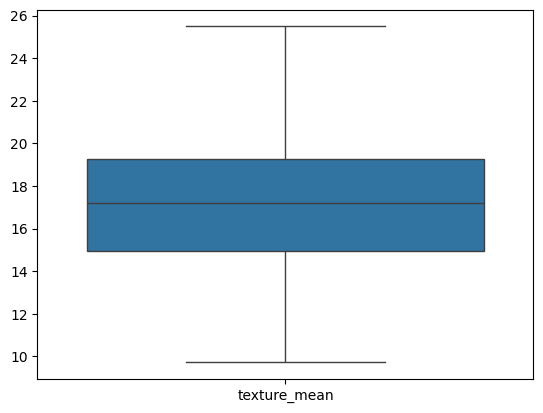

In [10]:
# finding outlier less boxplot of columns:


def put_a_value_m(df_column_m):
    
    Q1_volume_m = df_column_m.quantile(0.25)
    Q3_volume_m = df_column_m.quantile(0.75)
    IQR_volume_m = Q3_volume_m - Q1_volume_m
    
    print(f"Q1 :{Q1_volume_m}")
    print(f"Q3 :{Q3_volume_m}")
    print(f"IQR :{IQR_volume_m}")
    
    upper_limit_m = Q3_volume_m + (1.5) * IQR_volume_m
    lower_limit_m = Q1_volume_m - (1.5) * IQR_volume_m

    print("\nUpper Limit :",upper_limit_m)
    print("Lower Limit :",lower_limit_m)
    print("Without outliers graph malignant tumours is :")

    new_df = df_column_m[(df_column_m> lower_limit_m) & (df_column_m< upper_limit_m)]
    new_df

    new_df.value_counts().sum()
    sns.boxplot(new_df)




def put_a_value_b(df_column_b):
    
    Q1_volume_b = df_column_b.quantile(0.25)
    Q3_volume_b = df_column_b.quantile(0.75)
    IQR_volume_b = Q3_volume_b - Q1_volume_b
    
    print(f"Q1 :{Q1_volume_b}")
    print(f"Q3 :{Q3_volume_b}")
    print(f"IQR :{IQR_volume_b}")
    
    upper_limit_b = Q3_volume_b + (1.5) * IQR_volume_b
    lower_limit_b = Q1_volume_b - (1.5) * IQR_volume_b

    print("\nUpper Limit :",upper_limit_b)
    print("Lower Limit :",lower_limit_b)
    print("Without outliers graph of benign tumours is :")

    new_df = df_column_b[(df_column_b> lower_limit_b) & (df_column_b< upper_limit_b)]
    new_df

    new_df.value_counts().sum()
    sns.boxplot(new_df)



print("The columns are :")
new_column = df.drop("diagnosis", axis=1)
for index,value in enumerate(new_column.columns):
    print(f"[{index + 1}] : {value}")


value = int(input("Enter the column number to get the output :"))
try :
    if 0 <= value <= len(new_column.columns):
        selected_value = new_column.columns[value -1]
        print(f"Analyzing performance for: {selected_value}")
    else:
                print("Invalid number. Please try again.")
except ValueError:
            print("Invalid input. Please enter a number.")

# it will select the column which has malignant tumours
df_column_m = df[df["diagnosis"] == "M"][selected_value].reset_index()

# it will select the column which has benign tumours
df_column_b = df[df["diagnosis"] == "B"][selected_value].reset_index()

print("Enter which tumours(M/B) outlier less boxplot you want to see :")
value = input("Enter the M / B")
if value in "M,m":
    put_a_value_m(df_column_m.drop("index",axis=1))
    
elif value in "B,b":
    put_a_value_b(df_column_b.drop("index",axis=1))

else :
    print("INVALID ENTRY")